## <font color='darkblue'>Preface</font>
Here we are going to use a toy testing environment `GridWorld` to demonstrate the usage of this lab.

### <font color='darkgreen'>Importing Packages</font>
Firstly, let's import all the necessary packages:

In [95]:
from skyline import lab
from skyline.lab import gridworld_env
from skyline.lab import gridworld_utils
from skyline.lab.alg import monte_carlo

### <font color='darkgreen'>Make Lab Environment</font>
We can list supported environment as below:

In [96]:
lab.list_env()

===== GridWorld =====
This is a environment to show case of Skyline lab. The environment is a grid world where you can move up, down, right and leftif you don't encounter obstacle. When you obtain the reward (-1, 1, 2), the game is over. You can use env.info() to learn more.




Then We use function <font color='blue'>make</font> to obtain the desired environment. e.g.:

In [97]:
grid_env = lab.make(lab.Env.GridWorld)

In [98]:
# Check what our environment looks like:
grid_env.info()

- environment is a grid world
- x means you can't go there
- s means start position
- number means reward at that state
.  .  .  1
.  x  . -1
.  .  .  x
s  x  .  2



In [99]:
# Show available actions
grid_env.available_actions()

['U', 'D', 'L', 'R']

In [6]:
# Get current state
grid_env.current_state

GridState(i=3, j=0)

Let's take a action and check the state change:

In [7]:
# Take action 'Up'
grid_env.step('U')

# Check current state
grid_env.current_state

GridState(i=2, j=0)

After taking action `U`, we expect the axis-i to move up from 2->1 and we can confirm it from the output state. Let's reset the environment by calling method <font color='blue'>reset</font> which will bring the state of environment back to intial state `GridState(i=2, j=0)`:

In [8]:
# Reset environment
grid_env.reset()

# Check current state
grid_env.current_state

GridState(i=3, j=0)

## <font color='darkblue'>Experiments of RL algorithms</font>
Here we are going to test some well-known RL algorithms and demonstrate the usage of this lab:

<a id='monte_carlo_method'></a>
### <font color='darkgreen'>Monte Carlo Method</font>
<b><font size='3ptx'>In this method, we simply simulate many trajectories (<font color='darkbrown'>decision processes</font>), and calculate the average returns.</font></b> ([wiki page](https://en.wikiversity.org/wiki/Reinforcement_Learning#Monte_Carlo_policy_evaluation))

We implement this algorithm in `monte_carlo.py`. The code below will demonstrate the usage of it:

In [9]:
from skyline.lab.alg import monte_carlo

In [10]:
mc_alg = monte_carlo.MonteCarlo()

In [11]:
grid_env.info()

- environment is a grid world
- x means you can't go there
- s means start position
- number means reward at that state
.  .  .  1
.  x  . -1
.  .  .  x
s  x  .  2



In [12]:
grid_env.random_action(gridworld_env.GridState(1, 0))

'D'

#### Training

In [13]:
%%time
# Training
mc_alg.fit(grid_env)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1672.23it/s]

CPU times: user 4.43 s, sys: 1.87 s, total: 6.3 s
Wall time: 5.99 s


Let's check what value function we get:

In [14]:
gridworld_utils.print_values(mc_alg._state_2_value, grid_env)

---------------------------
 1.18| 1.31| 1.46| 1.00|
---------------------------
 1.31| 0.00| 1.62|-1.00|
---------------------------
 1.46| 1.62| 1.80| 0.00|
---------------------------
 1.31| 0.00| 2.00| 2.00|


Then let's print the learned policy:

In [15]:
gridworld_utils.print_policy(mc_alg._policy, grid_env)

---------------------------
  D  |  R  |  D  |  ?  |
---------------------------
  D  |  x  |  D  |  ?  |
---------------------------
  R  |  R  |  D  |  x  |
---------------------------
  U  |  x  |  R  |  ?  |


#### Prior run

Finally, let's reset the environment and play the game:

In [16]:
# Play game util done
grid_env.reset()

print(f'Begin state={grid_env.current_state}')
step_count = 0
while not grid_env.is_done:
    result = mc_alg.play(grid_env)
    step_count += 1
    print(result)
    
print(f'Final reward={result.reward} with {step_count} step(s)')

Begin state=GridState(i=3, j=0)
ActionResult(action='U', state=GridState(i=2, j=0), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='R', state=GridState(i=2, j=1), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='R', state=GridState(i=2, j=2), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='D', state=GridState(i=3, j=2), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='R', state=GridState(i=3, j=3), reward=2, is_done=True, is_truncated=False, info=None)
Final reward=2 with 5 step(s)


In [17]:
# Show learned value function
# mc_alg._state_2_value

In [18]:
# Show learned Q table
# mc_alg._q

<a id='random_method'></a>
### <font color='darkgreen'>Random Method</font>
This method takes random action in the given environment. It is often used as a based line to evaluate other RL methods.

In [19]:
from skyline.lab.alg import random_rl

In [20]:
random_alg = random_rl.RandomRL()

#### Train
Random won't require any training and therefore below call should end in no time.

In [21]:
%%time
# Training
random_alg.fit(grid_env)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 7.15 µs


#### Prior run
Since this is a random process, each time you play the game will have difference result:

In [22]:
# Play game util done
grid_env.reset()

print(f'Begin state={grid_env.current_state}')
step_count = 0
while not grid_env.is_done:
    result = random_alg.play(grid_env)
    step_count += 1
    print(result)
print(f'Final reward={result.reward} with {step_count} step(s)')

Begin state=GridState(i=3, j=0)
ActionResult(action='U', state=GridState(i=2, j=0), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='D', state=GridState(i=3, j=0), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='U', state=GridState(i=2, j=0), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='D', state=GridState(i=3, j=0), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='U', state=GridState(i=2, j=0), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='U', state=GridState(i=1, j=0), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='U', state=GridState(i=0, j=0), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='R', state=GridState(i=0, j=1), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='R', state=GridState(i=0, j=2), reward=0, is_done=False, is_truncated=False, info=No

From the result above, it is obvious that the <a href='#monte_carlo_method'><b>Monte Carlo Method</b></a> performs much better than the <a href='#random_method'><b>Random Method</b></a>!

## <font color='darkblue'>Scoreboard</font>
Before we know how score board work, we need to understand <b><font color='blue'>RLExaminer</font></b> first.

### <font color='darkgreen'>RLExaminer</font>
Every environment can have more than one examiner to calculate the score of RL method. Each examiner may have its own aspect to evaluate the RL method (time, reward etc.). Let's check one used to calculate the average reward of grid environment:

In [100]:
# This examiner considers both reward and number of steps.
examiner = gridworld_env.GridWorldExaminer()

Then, what's score of `Monte Carlo Method`:

In [24]:
examiner.score(mc_alg, grid_env) # 2 / 5 = 0.4

0.4

`Monte Carlo Method` got score 0.4. Let's check another RL method `Random Method`:

In [25]:
examiner.score(random_alg, grid_env)

0.05

`Random Method` got score 0.5 which is less than `Monte Carlo Method`.

### <font color='darkgreen'>Score Board</font>
<b><font color='blue'>Scoreboard</font></b> literally calculate the scores of given RL methods according to the specific examiner and the rank those RL methods accordingly:

In [101]:
score_board = lab.Scoreboard()

In [27]:
sorted_scores  = score_board.rank(
    examiner=examiner, env=grid_env, rl_methods=[random_alg, mc_alg])

+-------+------------+---------------------+
| Rank. |  RL Name   |        Score        |
+-------+------------+---------------------+
|   1   | MonteCarlo |         0.4         |
|   2   |  RandomRL  | 0.13333333333333333 |
+-------+------------+---------------------+


In [28]:
sorted_scores

[('MonteCarlo', 0.4), ('RandomRL', 0.13333333333333333)]

## <font color='darkblue'>A Real World RL problem (BCST test case selection)</font>
Here we are going to use a real-world RL example to explain how this lab works. From environment BCST, we want to select test cases strategically so to form a test case execution sequence which will obtain the maximum accumulated reward.

From BCST environment:
* Each action is a selected test case.
* State is the sequence of last executed test case sequence.
* A reward equal to 1 means the execution resulted in a crash/ramdump or 0 means nothing was caught.

### <font color='darkgreen'>Explore the environment</font>

In [29]:
import matplotlib.pyplot as plt
from skyline.lab import bcst_tc_env

#### Initialize environment and show info of it

In [102]:
bcst_env = bcst_tc_env.BCSTEnvironment()
bcst_examiner = bcst_tc_env.BCSTRewardCountExaminer()

bcst_env.info()

- Environment as BCST testing environment.
- You can set attribute `round_num` of environment to decide the max round  of execution.
- Each action is a test case to select.
- State is the sequence of last executed test case sequence.
- A reward equal to 1 means the execution resulted in a crash/ramdump or 0 means nothing was caught.


#### Supported actions

In [103]:
bcst_env.available_actions()

['rl_test_case2',
 'rl_test_case1',
 'rl_test_case5',
 'rl_test_case4',
 'rl_test_case3']

#### Available states

In [104]:
bcst_env.available_states()[:10]

[(),
 ('rl_test_case2',),
 ('rl_test_case1',),
 ('rl_test_case5',),
 ('rl_test_case4',),
 ('rl_test_case3',),
 ('rl_test_case2', 'rl_test_case2'),
 ('rl_test_case2', 'rl_test_case1'),
 ('rl_test_case2', 'rl_test_case5'),
 ('rl_test_case2', 'rl_test_case4')]

#### Take a few actions to execute for experience

In [33]:
bcst_env.step('rl_test_case1')

ActionResult(action='rl_test_case1', state=('rl_test_case1',), reward=0, is_done=False, is_truncated=False, info=None)

In [34]:
bcst_env.step('rl_test_case2')
bcst_env.step('rl_test_case3')
bcst_env.current_state

('rl_test_case1', 'rl_test_case2', 'rl_test_case3')

In [35]:
bcst_env.step('rl_test_case4')
bcst_env.step('rl_test_case5')
bcst_env.current_state

('rl_test_case3', 'rl_test_case4', 'rl_test_case5')

### <font color='darkgreen'>Random RL</font>
Let's check our baseline `Random Method`:

#### Train

In [36]:
%%time
# Training
random_alg.fit(bcst_env)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 7.63 µs


#### Prior run

In [37]:
bcst_env.reset()
random_alg.play(bcst_env)

ActionResult(action='rl_test_case4', state=('rl_test_case4',), reward=0, is_done=False, is_truncated=False, info=None)

#### Score

In [38]:
score, _ = bcst_examiner.score(random_alg, bcst_env, play_round=10)
print(f'Score={score:.02f}')

Score=60.60


### <font color='darkgreen'>Monte Carlo Method</font>
Next let's check `Monte Carlo Method` with three cases:
* `ml_alg_r1000`: Play 1000 times in BCST environment.
* `ml_alg_r3000`: Play 3000 times in BCST environment.
* `ml_alg_r5000`: Play 5000 times in BCST environment.

In [39]:
mc_alg_r1000 = monte_carlo.MonteCarlo(name='mc_r1000', round_num=1000)
mc_alg_r3000 = monte_carlo.MonteCarlo(name='mc_r3000', round_num=3000)
mc_alg_r5000 = monte_carlo.MonteCarlo(name='mc_r5000', round_num=5000)

#### Train

In [65]:
%%time
# Training by playing 1000 times in BCST environment.
mc_alg_r1000.fit(bcst_env)

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 224.77it/s]

CPU times: user 3.3 s, sys: 1.51 s, total: 4.81 s
Wall time: 4.46 s


In [77]:
%%time
# Training by playing 3000 times in BCST environment.
mc_alg_r3000.fit(bcst_env)

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:15<00:00, 199.03it/s]

CPU times: user 9.7 s, sys: 6.56 s, total: 16.3 s
Wall time: 15.1 s


In [74]:
%%time
# Training by playing 5000 times in BCST environment.
mc_alg_r5000.fit(bcst_env)

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:23<00:00, 208.36it/s]

CPU times: user 17.7 s, sys: 9.9 s, total: 27.6 s
Wall time: 24 s


#### Score

In [71]:
score, r1000_data = bcst_examiner.score(mc_alg_r1000, bcst_env, play_round=15)
print(f'Monte Carlo Method ({mc_alg_r1000.name}) with average score={score:.02f}')

Monte Carlo Method (mc_r1000) with average score=93.67


In [78]:
score, r3000_data = bcst_examiner.score(mc_alg_r3000, bcst_env, play_round=15)
print(f'Monte Carlo Method ({mc_alg_r3000.name}) with average score={score:.02f}')

Monte Carlo Method (mc_r3000) with average score=107.73


In [79]:
score, r5000_data = bcst_examiner.score(mc_alg_r5000, bcst_env, play_round=15)
print(f'Monte Carlo Method ({mc_alg_r5000.name}) with average score={score:.02f}')

Monte Carlo Method (mc_r5000) with average score=159.07


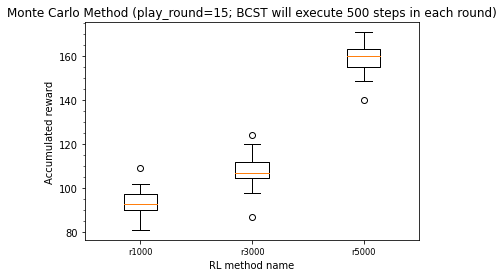

In [80]:
# diminishing returns
fig, ax = plt.subplots()
ax.set_title('Monte Carlo Method (play_round=15; BCST will execute 500 steps in each round)')
ax.boxplot([r1000_data, r3000_data, r5000_data], labels=['r1000', 'r3000', 'r5000'])
plt.ylabel('Accumulated reward')
plt.xlabel('RL method name')
plt.minorticks_on()
plt.tick_params(axis='x', which='minor', bottom=False)
plt.tick_params(axis='x', which='major', labelsize='small')
plt.show()

### <font color='darkgreen'>BCST Test case selector</font>
From BCST in G3, we implement our own RL method.

In [81]:
from skyline.lab.alg import bcst_epsilon_tcs_rl

In [82]:
bcst_rl_method_r1000 = bcst_epsilon_tcs_rl.EGreedyStrategy(name='tcs_r1000', round_num=1000)
bcst_rl_method_r2000 = bcst_epsilon_tcs_rl.EGreedyStrategy(name='tcs_r2000', round_num=2000)
bcst_rl_method_r3000 = bcst_epsilon_tcs_rl.EGreedyStrategy(name='tcs_r3000', round_num=3000)

#### Train

In [83]:
%%time
# Training by playing 1000 times in BCST environment.
bcst_rl_method_r1000.fit(bcst_env)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.17it/s]

CPU times: user 52.1 s, sys: 238 ms, total: 52.3 s
Wall time: 52.2 s


In [84]:
%%time
# Training by playing 2000 times in BCST environment.
bcst_rl_method_r2000.fit(bcst_env)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:38<00:00, 20.28it/s]

CPU times: user 1min 38s, sys: 534 ms, total: 1min 38s
Wall time: 1min 38s


In [85]:
%%time
# Training by playing 3000 times in BCST environment.
bcst_rl_method_r3000.fit(bcst_env)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [02:32<00:00, 19.71it/s]

CPU times: user 2min 31s, sys: 1.11 s, total: 2min 32s
Wall time: 2min 32s


In [86]:
level_one_knowledge = bcst_rl_method_r3000.qtable['3'].items()
sorted(level_one_knowledge, key=lambda t: -t[1].accumulated_reward)[:3]

[(('rl_test_case3', 'rl_test_case4', 'rl_test_case5'),
  ExecutionHistory(count=30911, accumulated_reward=30797.0)),
 (('rl_test_case2', 'rl_test_case4', 'rl_test_case1'),
  ExecutionHistory(count=31781, accumulated_reward=20436.0)),
 (('rl_test_case4', 'rl_test_case1', 'rl_test_case3'),
  ExecutionHistory(count=26873, accumulated_reward=13874.0))]

In [87]:
bcst_rl_method_r3000._run_policy(bcst_env)

'rl_test_case4'

#### Score

In [92]:
score, r1000_data = bcst_examiner.score(bcst_rl_method_r1000, bcst_env, play_round=30)
print(f'BCST TC selector ({bcst_rl_method_r1000.name}) with average score={score:.02f}')

BCST TC selector (tcs_r1000) with average score=169.60


In [90]:
score, r2000_data = bcst_examiner.score(bcst_rl_method_r2000, bcst_env, play_round=30)
print(f'BCST TC selector ({bcst_rl_method_r2000.name}) with average score={score:.02f}')

BCST TC selector (tcs_r2000) with average score=201.57


In [91]:
score, r3000_data = bcst_examiner.score(bcst_rl_method_r3000, bcst_env, play_round=15)
print(f'BCST TC selector ({bcst_rl_method_r3000.name}) with average score={score:.02f}')

BCST TC selector (tcs_r3000) with average score=221.00


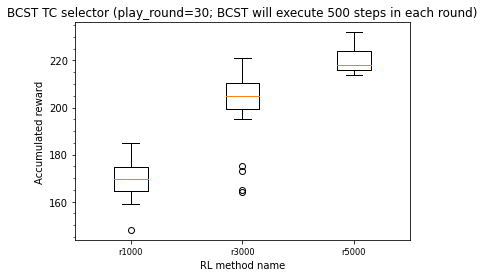

In [93]:
fig, ax = plt.subplots()
ax.set_title('BCST TC selector (play_round=30; BCST will execute 500 steps in each round)')
ax.boxplot([r1000_data, r2000_data, r3000_data], labels=['r1000', 'r3000', 'r5000'])
plt.ylabel('Accumulated reward')
plt.xlabel('RL method name')
plt.minorticks_on()
plt.tick_params(axis='x', which='minor', bottom=False)
plt.tick_params(axis='x', which='major', labelsize='small')
plt.show()

### <font color='darkgreen'>Score Board</font>
Finally, let's check the ranking among supported RL methods:

In [94]:
sorted_scores  = score_board.rank(
    examiner=bcst_examiner, env=bcst_env,
    rl_methods=[random_alg, mc_alg_r1000, mc_alg_r3000, mc_alg_r5000,
                bcst_rl_method_r1000, bcst_rl_method_r2000, bcst_rl_method_r3000])

+-------+-----------+-------------------------------------------------------------+
| Rank. |  RL Name  |                            Score                            |
+-------+-----------+-------------------------------------------------------------+
|   1   | tcs_r3000 | (217.4, [218, 218, 204, 218, 213, 219, 219, 208, 229, 228]) |
|   2   | tcs_r2000 | (171.2, [175, 172, 171, 165, 169, 178, 178, 163, 170, 171]) |
|   3   | tcs_r1000 | (166.3, [166, 172, 162, 176, 155, 160, 169, 164, 165, 174]) |
|   4   |  mc_r5000 | (157.6, [170, 162, 170, 160, 166, 148, 152, 147, 152, 149]) |
|   5   |  mc_r3000 |  (106.9, [118, 105, 103, 108, 111, 106, 119, 104, 104, 91]) |
|   6   |  mc_r1000 |      (93.8, [90, 86, 99, 86, 99, 90, 104, 100, 93, 91])     |
|   7   |  RandomRL |       (58.1, [59, 53, 59, 59, 57, 60, 57, 53, 51, 73])      |
+-------+-----------+-------------------------------------------------------------+


## <font color='darkblue'>Supplement</font>
* [Udemy - Artificial Intelligence: Reinforcement Learning in Python](https://www.udemy.com/course/artificial-intelligence-reinforcement-learning-in-python/)